# Tasks

Machine Learning and Statistics

winter 23/24

Jamie Roche
***

In [1]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay

### Task 1

 > Square roots are difficult to calculate. In Python, you typically
use the power operator (a double asterisk) or a package such as `math`. In this task,1 you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package
>
> Rather, you should use the Newton’s method. Start with initial guess for the square root called `z0`. You then repeatedly improve it using the following formula, until the difference between
some previous guess zi and the next zi+1 is less than some threshold, say `0.01`.



$$ z_{i+1} = z_i - \frac{z_i × z_i-x}{2z_i}$$

~~ https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

~~ https://docs.document360.com/docs/how-to-center-align-the-text-in-markdown

In [2]:
def sqrt(x):
    # inital guess
    z = x/4.0

    # loop until reasonable accurate guess is achieved 
    
    while ((z*z-x)>0.000000001):
        
        z = z - (((z*z)-x)/(2*z))

    return z

In [3]:
# Test Function 
num = 90
y = sqrt(num)
y

9.486832980511155

In [4]:
# compare differnece between python and newtons 

abs((num**0.5)-y)


6.016520615048648e-12

End Task 1 - Improve answer later 

# Task 2

>Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. 
>
>Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an asociation between drink preference and biscuit preference in this instance.


| Drink   | Chocolate | Plain |
|---------|-----------|-------|
| Coffee  | 43        | 57    |
| Tea     | 56        | 45    |


Formula for the Chi-squared test:

$$ x^2 = \Sigma \frac{(O_i - E_i)^2}{E_i}$$


In [5]:
# people who like Coffee and Choclate Biscuits
countCChoc = 43
coffee_choc = [['Coffee', 'Chocolate']] * countCChoc

# People who like Tea and Chocolaye 
countTChoc = 56
tea_choc = [['Tea', 'Chocolate']] * countTChoc

# People who like Coffe and Plain
countCPlain = 57
Coffee_plain = [['Coffee', 'Plain']] * countCPlain

# People who like Tea and Plain
CountTplain = 45
tea_plain = [['Tea', 'Plain']] * CountTplain


In [6]:
# Complie the data together 
raw_data = coffee_choc + tea_choc + Coffee_plain + tea_plain

# Shuffle data to give the appearance of randomness 
random.shuffle(raw_data)

raw_data


[['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],

In [7]:
# create the data frame to perform tests on 
Drink, Biscuit =list(zip(*raw_data))
df = pd.DataFrame({'Drink': Drink, 'Biscuit': Biscuit})

# preform cross tab contingency
ct = ss.contingency.crosstab(df['Drink'],df['Biscuit'])

first,second = ct.elements

df[df['Drink']==first[0]]

,Drink,Biscuit
0,Coffee,Chocolate
5,Coffee,Plain
6,Coffee,Plain
13,Coffee,Chocolate
14,Coffee,Chocolate
...,...,...
185,Coffee,Plain
186,Coffee,Chocolate
187,Coffee,Plain
189,Coffee,Plain


In [8]:
results = ss.chi2_contingency(ct.count, correction=False)

results

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [9]:
results.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

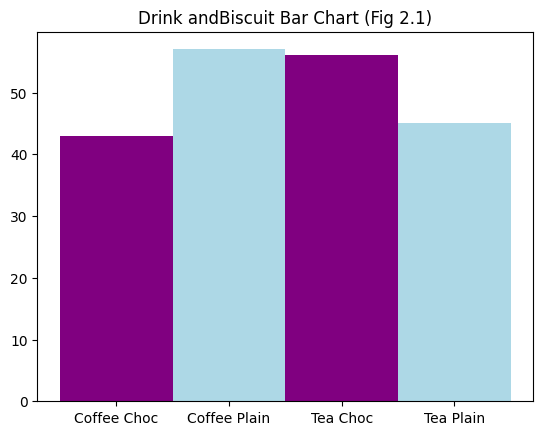

In [10]:
#https://www.w3schools.com/python/matplotlib_bars.asp
#https://stackoverflow.com/questions/20454120/how-to-remove-gaps-between-bars-in-a-bar-chart 

# create a bar chart to visulise the data
xC = np.array(["Coffee Choc","Coffee Plain"])
xT = np.array(["Tea Choc","Tea Plain"])
yC = np.array([countCChoc,countCPlain])
yT = np.array([countTChoc,CountTplain])
colour = ["purple","lightBlue"]
plt.bar(xC,yC,width=1.0,color=colour)
plt.bar(xT,yT,width=1.0,color=colour)
plt.title('Drink andBiscuit Bar Chart (Fig 2.1)')
plt.show()

In [11]:
# https://people.richland.edu/james/lecture/m170/tbl-chi.html
# https://www.youtube.com/watch?v=HKDqlYSLt68
dof = 1
#for a 5% significance level according to the Chi Square table, result should be 3.841 or less
Significance_level = 3.841

# Manually calculate Sum of the observed values - expected values
Chi2 = ((((43-49.254)**2)/49.254)+(((57-50.746)**2)/50.746)+(((56-49.746)**2)/49.746)+(((45-51.254)**2)/51.254))
Chi2

3.114204911145081

To reject the null hypothesis the value of the significane level - the actual level should be a negative number. 
Meaning the 

In [12]:
Significance_level - Chi2 

0.7267950888549191

In [13]:
print (99/201) # proportion of people who prefer chocolate, drink does not matter, 
print (102/201) # proportion of people who prefer Plain, drink does not matter, 

0.4925373134328358
0.5074626865671642


### Observations

Although the results initially appear to suggest there is a correlation between drink type and preferred biscuit. 
There is not enough evidence to reject the null hypothesis for a five percent significance level. At a glance, Drink and Biscuit Bar Chart (Fig 2.1) might lead one to believe of an existing correlation. 

In this instance, for a five percent significance level, with one degree of freedom the statistic produced by the chi square test would have to be greater than 3.841. The actual statistic was found to be 3.1139, and the P value was 0.0776.

This is not enough evidence to determine there is a correlation between drink and biscuit choice. 
Thus, the null hypothesis cannot be rejected for this set of data.


# Create graph and argue the data shows there is a relationship between drink and bicuit 

# Task 3

>Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv

In [14]:
#read url https://bobbyhadz.com/blog/read-csv-file-from-url-using-python
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

df = pd.read_csv(url,sep=',',encoding='utf-8',)

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [15]:
# Take just Gentoo Penguins
allGentoo = df[df["species"]=="Gentoo"]

In [16]:
# Take just male gentoo for sample a
sample_a = allGentoo[allGentoo["sex"]=="MALE"]["body_mass_g"].to_numpy()

sample_a

array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
       5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
       5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
       5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
       5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
       5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
       5500., 5950., 5500., 5850., 6000., 5750., 5400.])

In [17]:
# Take just females for sample b
sample_b = allGentoo[allGentoo["sex"]=="FEMALE"]["body_mass_g"].to_numpy()

sample_b

array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
       4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
       4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
       4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
       4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
       4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
       4375., 4925., 4850., 5200.])

In [18]:
#https://www.southampton.ac.uk/passs/gcse_scores/bivariate_analysis/t_test.page#:~:text=If%20a%20p%2Dvalue%20reported,then%20the%20result%20is%20insignificant.
# run t-test
ss.ttest_ind(sample_a,sample_b)  

Ttest_indResult(statistic=14.721676481405709, pvalue=2.133687602018886e-28)

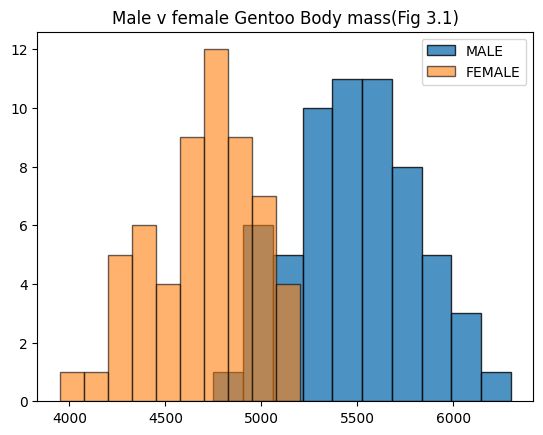

In [19]:
# https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/ 

# Create a histogram to visulise the difference in the data sets for male and female
plt.hist(sample_a, label="MALE",alpha=.8,edgecolor="Black")
plt.hist(sample_b,label="FEMALE",alpha=.6,edgecolor="Black")
plt.legend()
plt.title('Male v female Gentoo Body mass(Fig 3.1)')
plt.show() 

### Obersrvations 

This test is to investigate if there is a discrepancy in the body mass difference between Male and Female Gentoo penguins.
Using the T-Test we can see the P value is approximately 2.133e-28. This is a quite small number. 

For the P value to suggest there is enough evidence to show there is a substantial difference in the mean of the body masses of both Male and Female Gentoo Penguins the P value would have to be less than 0.05 This would give us a 95% confidence in the distinguish between both sexes. 

As we have received a p value of approximately 2.133e-28 this confirms the null hypothesis can be rejected, and evidence shows there is a difference in this data. This difference can be visualised in Male v female Gentoo Body mass (Fig 3.1).
There is a small overlap for larger females and smaller males, but it can be noted there is some distance between the mean of both Male and Female penguins. Confirming the rejection of the null hypothesis theory and suggesting the difference between the sexes. 


# Task 4

 Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.


In [20]:
url ="https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"


df = pd.read_csv(url,sep=',',encoding='utf-8',)
df_NoNA = df.dropna()

print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [21]:
clf = KNeighborsClassifier()

X1 = df_NoNA[['sepal_length','sepal_width']]
X2 =df_NoNA[['petal_length','petal_width']]



In [22]:
Y=df_NoNA['species']
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X1,Y) 

clf.fit(X_train,y_train)

res = clf.predict(X_test) == y_test

res

108    False
100     True
76      True
113    False
41     False
125     True
78      True
43      True
19      True
139    False
140    False
10      True
107     True
97      True
68      True
28      True
119    False
22      True
26      True
141    False
101    False
46      True
37      True
27      True
126    False
143     True
5       True
138    False
133     True
88      True
20      True
35      True
60      True
89      True
48      True
8       True
94      True
30      True
Name: species, dtype: bool

In [24]:
cross_val_score(clf,X1,Y,cv=5)


array([0.73333333, 0.73333333, 0.76666667, 0.83333333, 0.73333333])

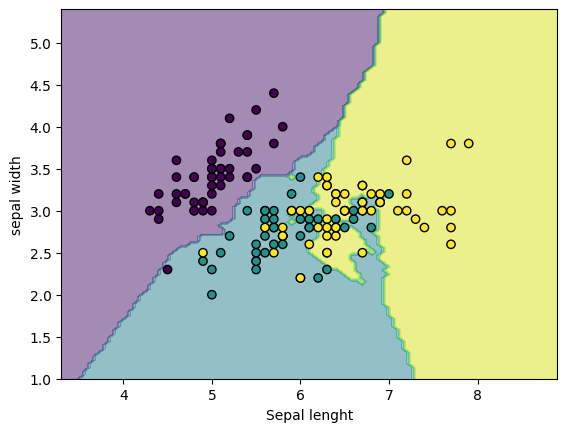

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X1, response_method="predict",
    xlabel="Sepal lenght", ylabel="sepal width",
    alpha=0.5,
)
disp.ax_.scatter(X1['sepal_length'], X1['sepal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.show()

In [26]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,Y) # 23

clf.fit(X2_train,y2_train)

res2 = clf.predict(X2_test) == y2_test

res2

129     True
121     True
59      True
80      True
63      True
69      True
61      True
46      True
134     True
20      True
126     True
6       True
81      True
106    False
55      True
93      True
136     True
101     True
8       True
94      True
53      True
147     True
111     True
52      True
47      True
50      True
74      True
14      True
148     True
120     True
32      True
45      True
84      True
119    False
77     False
31      True
107     True
131     True
Name: species, dtype: bool

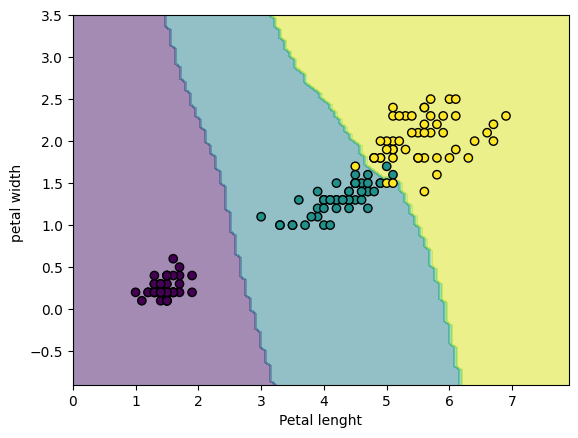

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html
disp = DecisionBoundaryDisplay.from_estimator(
    clf, X2, response_method="predict",
    xlabel="Petal lenght", ylabel="petal width ",
    alpha=0.5,
)
disp.ax_.scatter(X2['petal_length'], X2['petal_width'], c=Y.astype('category').cat.codes, edgecolor="k")
plt.show()